In [1]:
from oniakRun.aggregate_result import aggregate_result

ks = [8]
root = "/media/mydrive/CDMA"

import json, os
import numpy as np

filename = os.path.join(root, "result/pm/cm{}_k{}_d{}_id*.json")
xs = np.arange(1400, 3001, 20)
ys = {}
cm = {}
agg_keys = {
    "set D size": "avg",
    "set E size": "avg",
    "time": "avg",
}

for k in ks:
    for x in xs:
        ys[k, x] = aggregate_result(filename.format(False, k, x), agg_keys)
        cm[k, x] = aggregate_result(filename.format(True, k, x), agg_keys)
        
# ys, cm

<Axes: title={'center': 'False Negatives Out of 100'}, xlabel='Sketch Size (\\# Counters)', ylabel='False Negative Rate'>

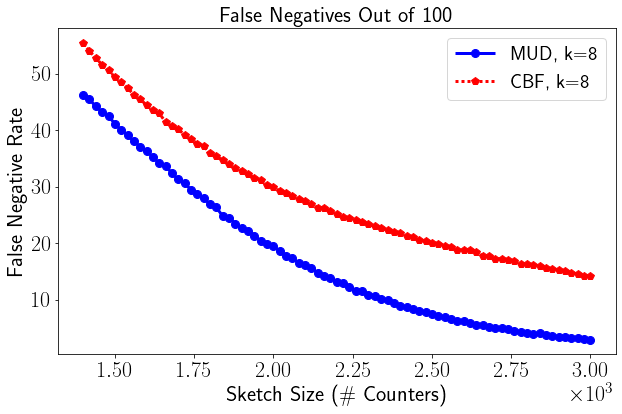

In [4]:
from oniakPlot import line_plot

data = [(xs, np.array([ys[k, x]["set D size"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["set D size"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "False Negative Rate", 
                      "False Negatives Out of 100", "plots/fnr_pm.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'Decoding time'}, xlabel='Sketch Size (\\# Counters)', ylabel='Time (s)'>

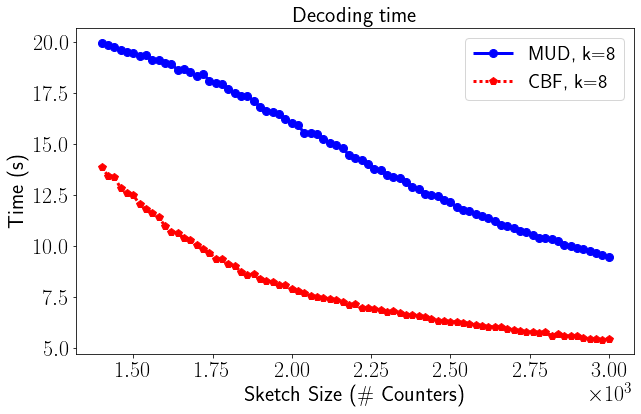

In [5]:
data = [(xs, np.array([ys[k, x]["time"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["time"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "Time (s)", "Decoding time", "plots/pm_time.pdf",
                      figsize=(10, 6))

<Axes: title={'center': 'False Positives'}, xlabel='Sketch Size (\\# Counters)', ylabel='False Positive Rate'>

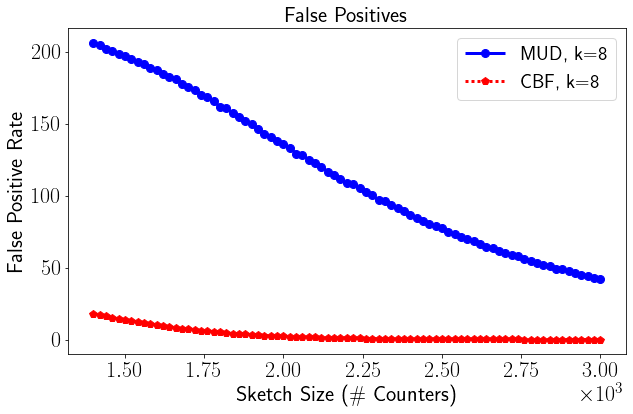

In [6]:
data = [(xs, np.array([ys[k, x]["set E size"] for x in xs])) for k in ks] \
  + [(xs, np.array([cm[k, x]["set E size"] for x in xs])) for k in ks]
labels = ["MUD, k={}".format(k) for k in ks] + ["CBF, k={}".format(k) for k in ks]

line_plot.plot_result(data, labels, "Sketch Size (\# Counters)", "False Positive Rate", 
                      "False Positives", "plots/fpr_pm.pdf",
                      figsize=(10, 6))

In [3]:
with open("result/pm/summary/aggregated_mud.json", "w") as f:
    json.dump({str(k): v for k, v in ys.items()}, f)
with open("result/pm/summary/aggregated_cm.json", "w") as f:
    json.dump({str(k): v for k, v in cm.items()}, f)
